# Paper Figures

Authors:  
Simone Orioli  | simone.orioli@nbi.ku.dk  
Felix K&uuml;mmerer | felix.kummerer@bio.ku.dk 

In [1]:
import ABSURDer as absurder
import numpy as np
import matplotlib.pyplot as plt
import pickle

The results of the manuscript have been obtained in slighlty different conditions with respect to the ones in the `absurder_example.ipynb` notebook. For all the different examples, we used a more extended range of `thetas` and ignored `Ala146` from the analysis (methyl 14 in the dataset). The following blocks of code will reproduce the scatter plots in Fig. 2,3 and 4 of Ref. [1]. The calculations in each block will take around 1h. Therefore, we also provide the precomputed results. To run the minimization anyway, uncomment `rw.reweight` and comment `rw.load_results`.   
In order to use advanced functionalities of the class, we suggest to load the list with the name of the methyls. In this way, the spectral densities and rotamer distributions will be properly numbered. ATTENTION: the list of methyls is assumed to be loaded in the same order as the rates, so we suggest to use the one provided as an output in `specdens_mapping.py`. 

Information used identically in all the blocks

In [2]:
labels     = [ r'($D_z$)', r'($D_y$)', r'($3D_z^2-2$)' ]
thetas     = np.concatenate( ( np.array([0, 50]), np.arange( 100, 1500, 100 ), np.arange( 1500, 8500, 500 ) ) )
ntrajs     = 3 
block_size = 1000
nblocks    = 1500
len_traj   = int( nblocks/ntrajs )
wd         = 145.858415

## Block Size Analysis

In [3]:
def rmsd( r, md, exp ):
    return np.sum( (exp[r] - md[r])**2 ) / np.shape(md)[-1]

md      = {}
lenghts = [ 2, 4, 6, 8, 10, 16, 20, 40, 60, 100, 250, 1000, 5000 ]
for l in lenghts:
    filename = f'block_length_analysis/rates_{l}_ns.pkl'
    pin = open( filename, "rb" )
    r = pickle.load(pin)
    md[l] = r
    
md_avg         = {}
md_std         = {}
md_std_avg     = {}
md_std_avg_avg = {}
yy             = []
rmsds          = []

for k in md.keys():
    md_avg[k] = np.average( md[k], axis = -1 )

for k in sorted( md.keys() ):
    md_std[k] = np.std( md[k], axis = -1 )
    md_std_avg[k] = np.average( md_std[k], axis = -1 )
    md_std_avg_avg[k] = 1. / np.average( md_std_avg[k], axis = -1 )
    md_std[k] /= np.sqrt( np.shape(md[k])[1] )
    yy.append( md_std_avg_avg[k] )
yy = np.array( yy )

for i in sorted(md_avg.keys()):
    tmp = []
    for r in range(3):
        tmp.append( rmsd( r, md_avg[i], md_avg[5000] ) )
    rmsds.append( np.sum( tmp )/3 )

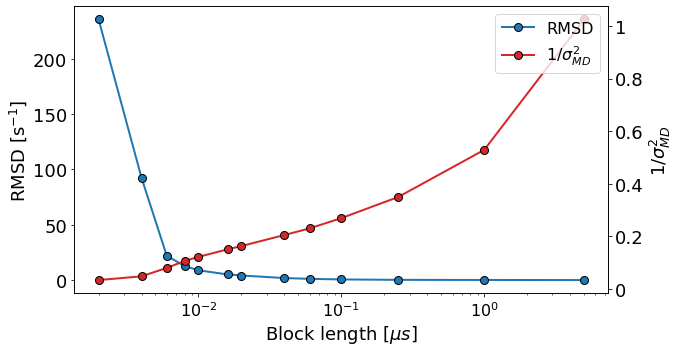

In [4]:
fig, ax1 = plt.subplots( figsize = [9.55,5] )

blenghts    = np.array( sorted(md_avg.keys()) )/1000
ax1_ylabels = [0,0, 50, 100, 150, 200, 300, 400]
ax2_ylabels = [0,0,.2,.4,.6,.8,1]

ax1.plot( blenghts, rmsds, lw = 2, marker = 'o', markersize = 8, markeredgecolor = 'k', label = r'RMSD' )
ax1.set_xlabel( r'Block length [$\mu s$]', fontsize = 18 )
ax1.set_ylabel( r'RMSD [s$^{-1}$]', fontsize = 18 )
ax1.set_yticklabels( labels = ax1_ylabels, fontsize = 18 )
ax1.set_xscale( 'log' )

ax2 = ax1.twinx() 
ax2.plot( blenghts, yy, c = 'tab:red', lw = 2, marker = 'o', markersize = 8, markeredgecolor = 'k', label = r'$ 1 / \sigma_{MD}^2 $' )
ax2.set_ylabel( r'$ 1 / \sigma_{MD}^2 $', fontsize = 18 )
ax2.set_yticklabels( labels = ax2_ylabels, fontsize = 18 )
fig.legend( loc = "upper right", bbox_to_anchor = (1,1), bbox_transform = ax1.transAxes, fontsize = 16 )

fig.tight_layout()
plt.show()

## Same Force Field

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  100
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 18.07


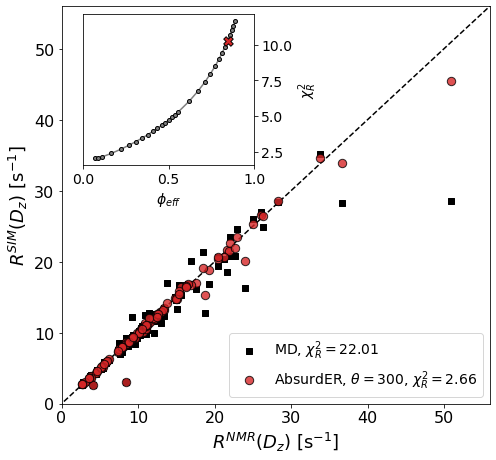

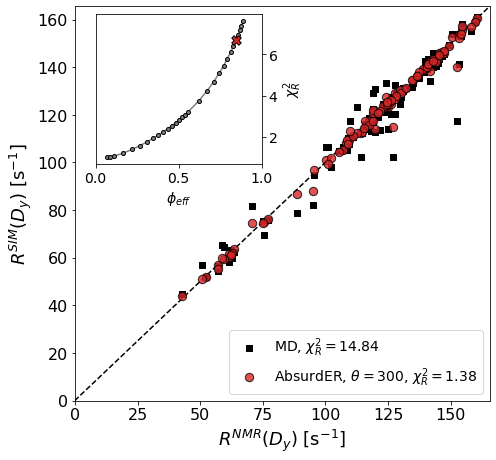

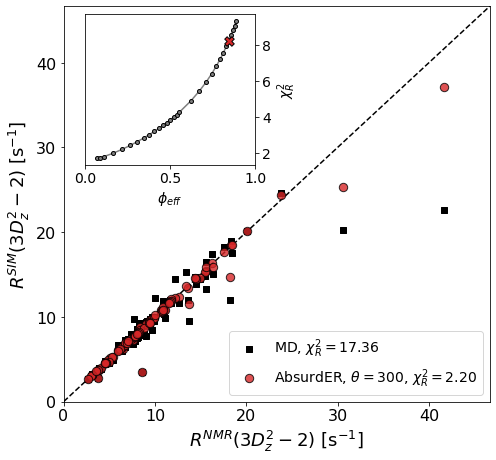

In [5]:
rex    = f'data/same_ff/nmr.npy'
rmd    = f'data/same_ff/md.npy'
out    = 'same_ff_results'
mlist  = 'methyls_lists/methyls_ff.pkl'
ala146 = [14]
rw     = absurder.ABSURDer( rex, rmd, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )

#rw.reweight( -1 )
rw.load_results('weights/same_ff.pkl')

opt_theta = 300
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

### Specral Densities 

In order to reproduce the remaining pictures in Fig. 2 in the paper, we can employ the `plot_specdens` and `plot_rotamer_distributions` functions. In order to use them, however, the outputs of `...` and `...` scripts are required. These are provided at the following link: `...`

In [6]:
rw.load_specdens( 'spectral_densities/exp_lvl1_spec.pkl', 'spectral_densities/exp_lvl1_Jome.pkl', 'spectral_densities/md_lvl1_spec.pkl' )

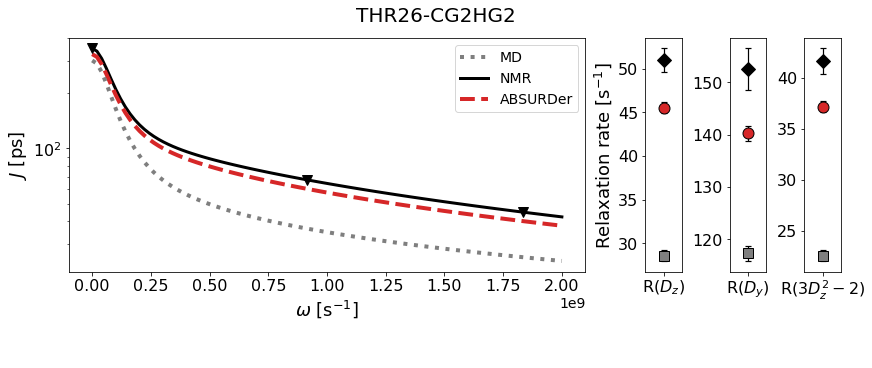

In [7]:
amino = 34 #THR26
rw.plot_specdens( amino, wd, opt_theta = opt_theta, rate_labels = labels, outfig = None )

### Rotamers

In [8]:
rw.load_rotamers('rotamers/same_ff_nmr.pkl', 'rotamers/same_ff_md.pkl', 'rotamers/same_ff_residues.pkl')

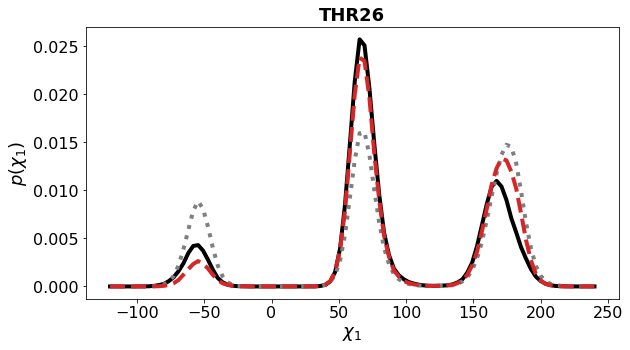

In [9]:
idx = 'THR26'
rw.plot_single_rotamer( idx, 0, nblocks, block_size, ntrajs, opt_theta )

### Rotamers Supplementary Figures

In [10]:
delta_phi = rw.phi_psi_rmsd( 2, nblocks, block_size, ntrajs, opt_theta )
delta_psi = rw.phi_psi_rmsd( 3, nblocks, block_size, ntrajs, opt_theta )

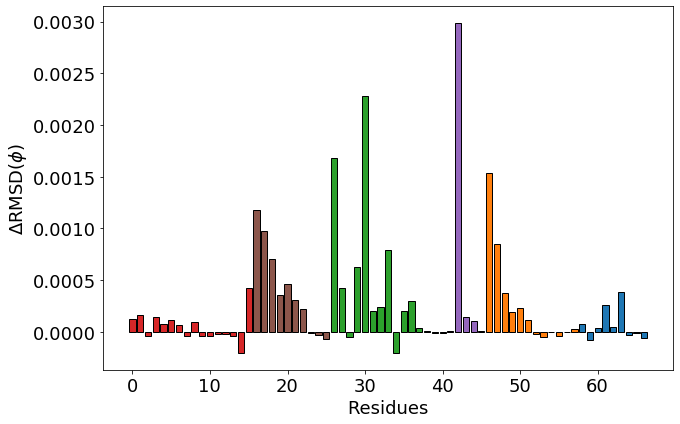

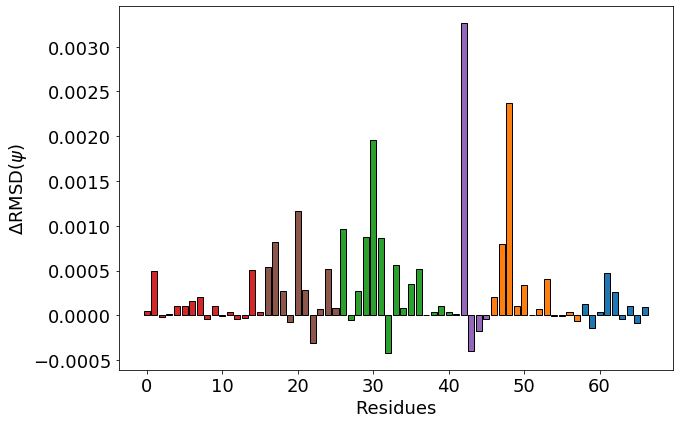

In [11]:
rw.plot_delta_rmsds( 2, delta_phi, r'$\phi$' )
rw.plot_delta_rmsds( 3, delta_psi, r'$\psi$' )

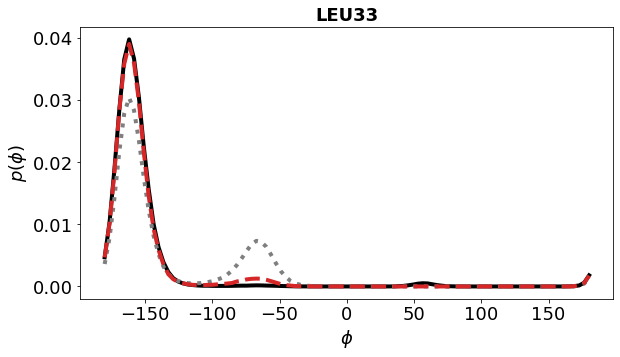

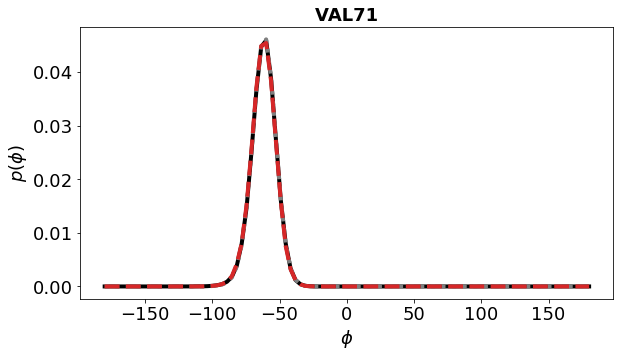

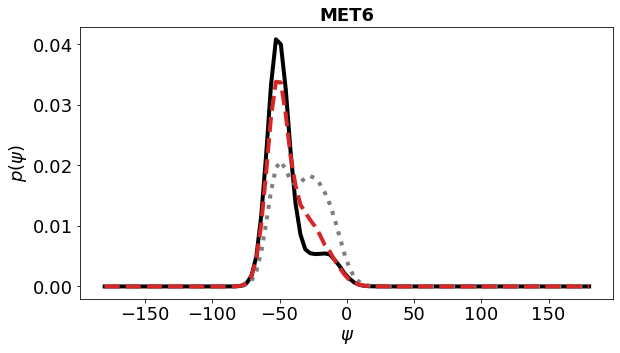

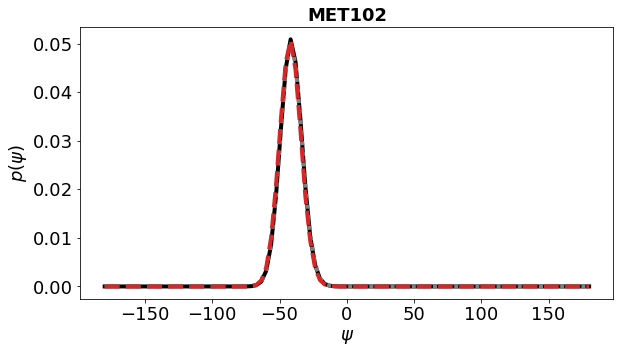

In [12]:
ang = 2
idx = 'LEU33'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

idx = 'VAL71'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

ang = 3
idx = 'MET6'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

idx = 'MET102'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

### Reweighting Supplementary Figures

In [13]:
rex    = 'data/same_ff/nmr_onlynmr.npy'
rmd    = 'data/same_ff/md_onlynmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/same_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  73
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 17.48


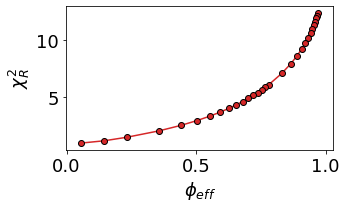

In [14]:
rw.plot_phix2r(-1)
phi_onlynmr = np.copy( rw.phi )
chi2_onlynmr = np.copy( rw.chi )

In [15]:
rex    = 'data/same_ff/nmr_nonmr.npy'
rmd    = 'data/same_ff/md_nonmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/same_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  28
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 19.04


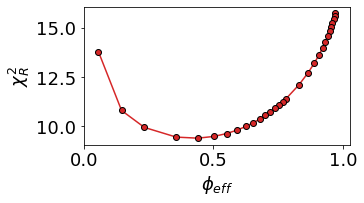

In [16]:
rw.plot_phix2r(-1)
phi_nonmr = np.copy( rw.phi )
chi2_nonmr = np.copy( rw.chi )

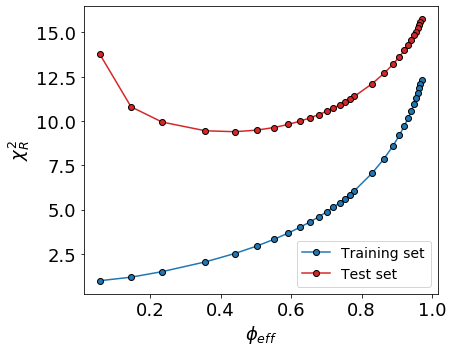

In [17]:
plt.figure( figsize = (6.4, 5) )
plt.plot( phi_onlynmr, chi2_onlynmr, 'o-', markeredgecolor = 'k', label = 'Training set' )
plt.plot( phi_nonmr,   chi2_nonmr,   'o-', markeredgecolor = 'k', label = 'Test set', c = 'tab:red',  )

plt.xlabel(r'$\phi_{eff}$')
plt.ylabel(r'$\chi^2_R$')
plt.legend()
plt.tight_layout()

## Different Force Fields

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  100
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 156.10


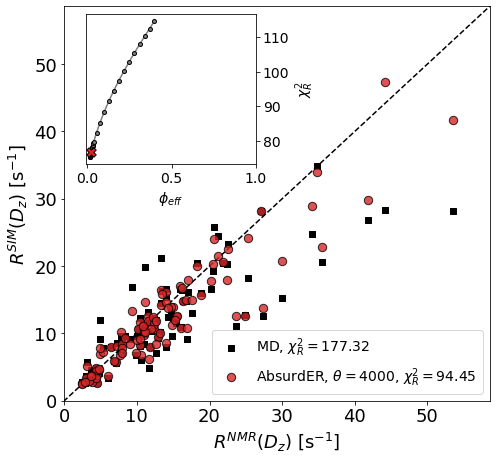

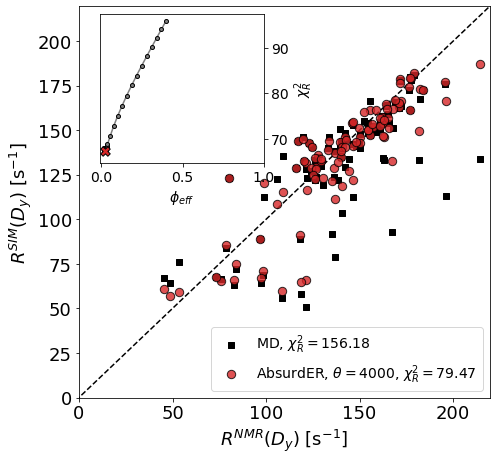

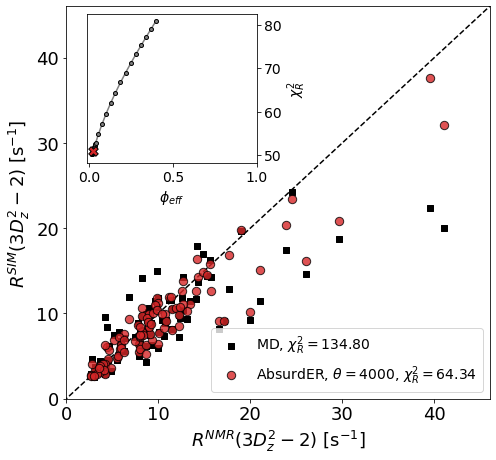

In [18]:
rex    = f'data/different_ff/nmr.npy'
rmd    = f'data/different_ff/md.npy'
out    = "different_ff_results"
mlist  = 'methyls_lists/methyls_ff.pkl'
ala146 = [14]

rw = absurder.ABSURDer( rex, rmd, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )
#rw.reweight( -1 )
rw.load_results('weights/different_ff.pkl')

opt_theta = thetas[-9]
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

### 2D Rotamer Probability Distribution Functions

In order to reproduce the remaining pictures in Fig. 3 in the paper, we can employ the `plot_2d_rotamers` function.

In [19]:
rw.load_rotamers('rotamers/different_ff_nmr.pkl', 'rotamers/different_ff_md.pkl', 'rotamers/different_ff_residues.pkl')

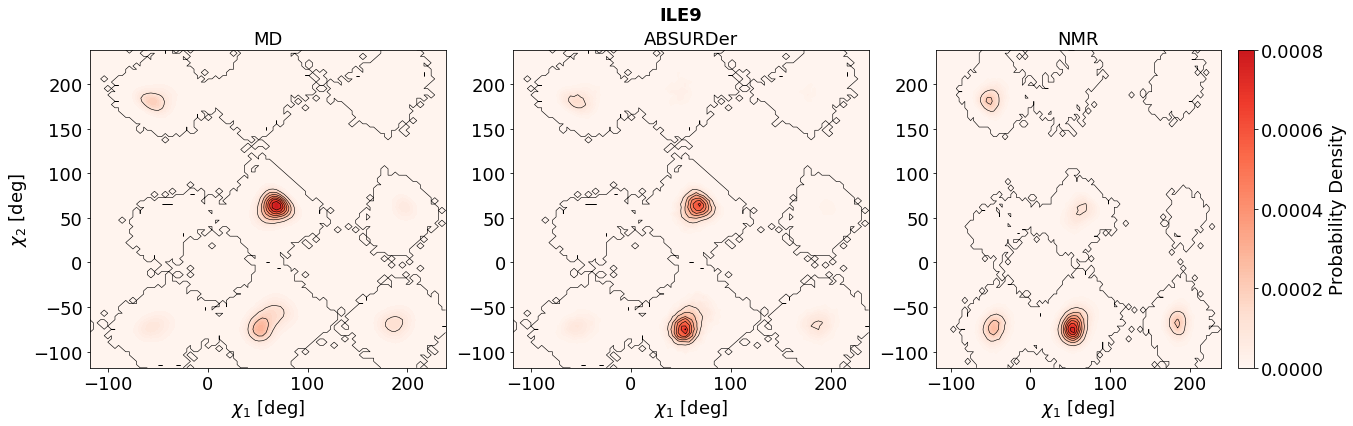

In [20]:
idx = 'ILE9'
rw.plot_2d_rotamers( idx, nblocks, block_size, ntrajs, opt_theta, outfig = None )

### Rotamers Supplementary Figure

In [21]:
delta_phi = rw.phi_psi_rmsd( 2, nblocks, block_size, ntrajs, opt_theta )
delta_psi = rw.phi_psi_rmsd( 3, nblocks, block_size, ntrajs, opt_theta )

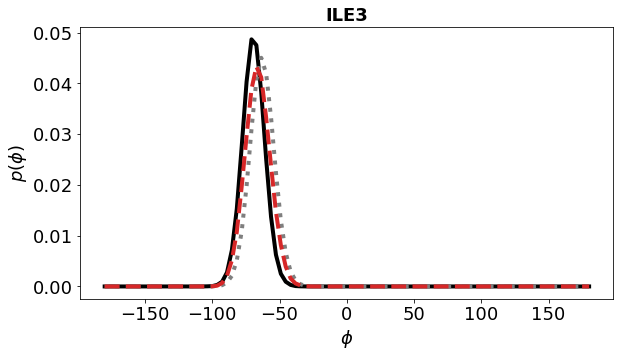

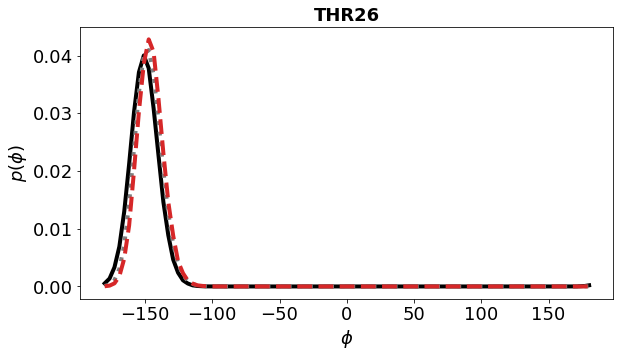

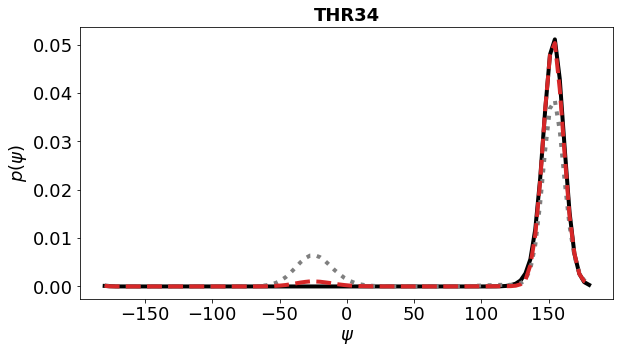

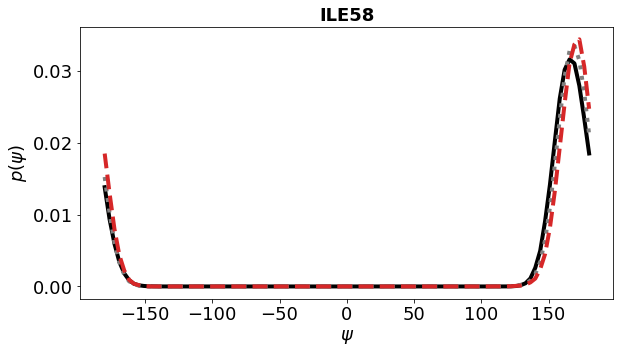

In [22]:
ang = 2
idx = 'ILE3'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

idx = 'THR26'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

ang = 3
idx = 'THR34'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

idx = 'ILE58'
rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

### Reweighting Supplementary Figures

In [23]:
rex    = 'data/different_ff/nmr_onlynmr.npy'
rmd    = 'data/different_ff/md_onlynmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/different_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  73
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 151.62


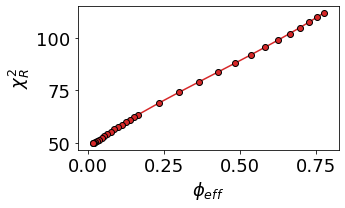

In [24]:
rw.plot_phix2r(-1)
phi_onlynmr = np.copy( rw.phi )
chi2_onlynmr = np.copy( rw.chi )

In [25]:
rex    = 'data/different_ff/nmr_nonmr.npy'
rmd    = 'data/different_ff/md_nonmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/different_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  28
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 162.79


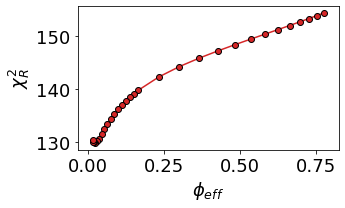

In [26]:
rw.plot_phix2r(-1)
phi_nonmr = np.copy( rw.phi )
chi2_nonmr = np.copy( rw.chi )

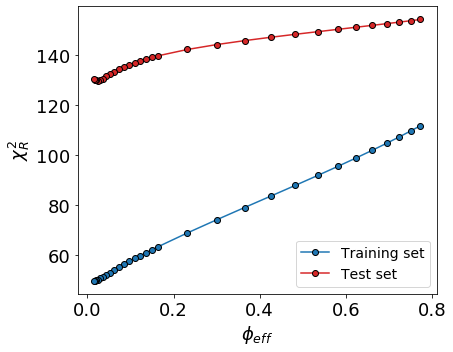

In [27]:
plt.figure( figsize = (6.4, 5) )
plt.plot( phi_onlynmr, chi2_onlynmr, 'o-', markeredgecolor = 'k', label = 'Training set' )
plt.plot( phi_nonmr,   chi2_nonmr,   'o-', markeredgecolor = 'k', label = 'Test set', c = 'tab:red',  )

plt.xlabel(r'$\phi_{eff}$')
plt.ylabel(r'$\chi^2_R$')
plt.legend()
plt.tight_layout()

## Experimental Data


# INFO ON THE DATASET
# Number of methyls:  72
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 130.10


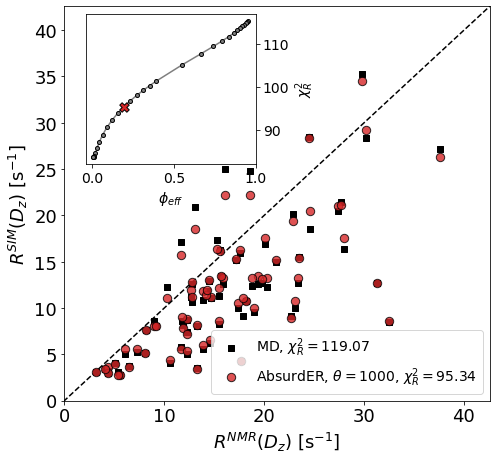

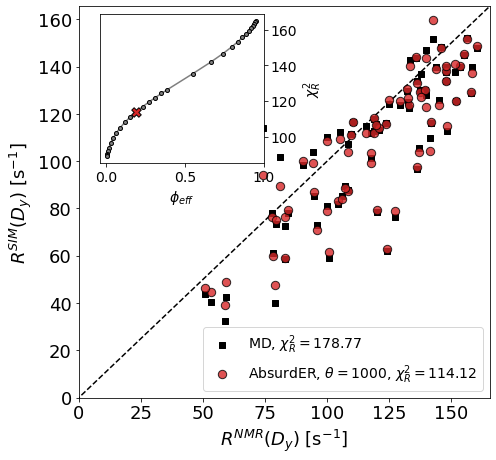

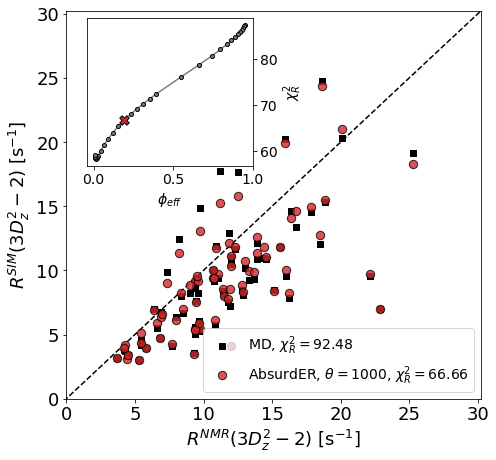

In [28]:
rex    = f'data/experimental/nmr_rates.npy'
eex    = f'data/experimental/nmr_errors.npy'
rmd    = f'data/experimental/md.npy'
mlist  = 'methyls_lists/methyls_nmr.pkl'
out    = "experimental_results"
ala146 = [4]

rw = absurder.ABSURDer( rex, rmd, eex, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )

#rw.reweight( -1 )
rw.load_results('weights/experimental.pkl')

opt_theta = rw.ths[-12]
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

### Rate Distribution Functions

In order to reproduce the remaining pictures in Fig. 4 in the paper, we can employ the `plot_rate_distributions()` function.

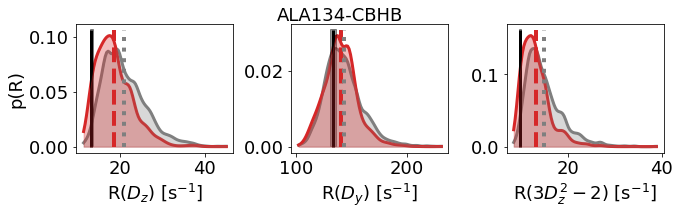

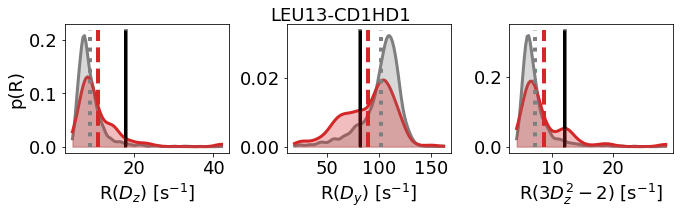

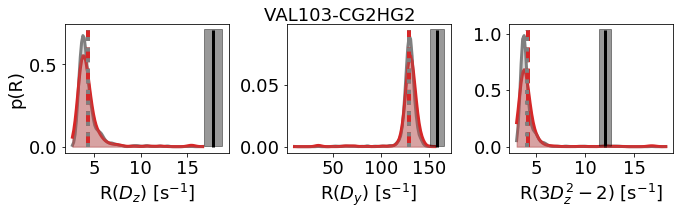

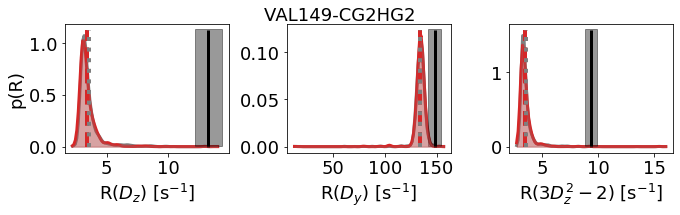

In [29]:
rw.plot_rate_distributions( 3,   opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( 38,  opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( -13, opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( -8,  opt_theta = opt_theta, rate_labels = labels )

### Sampling

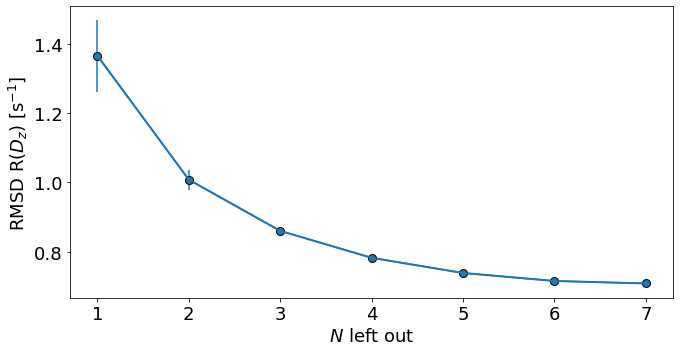

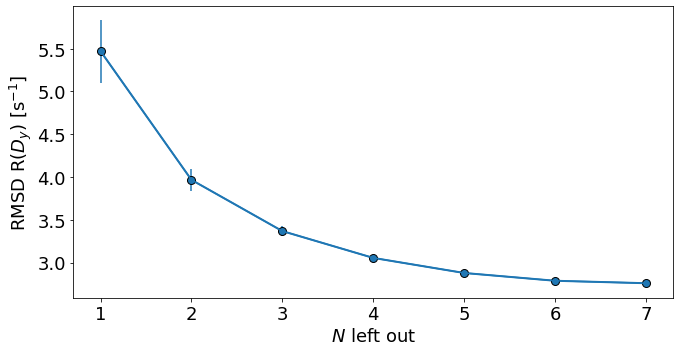

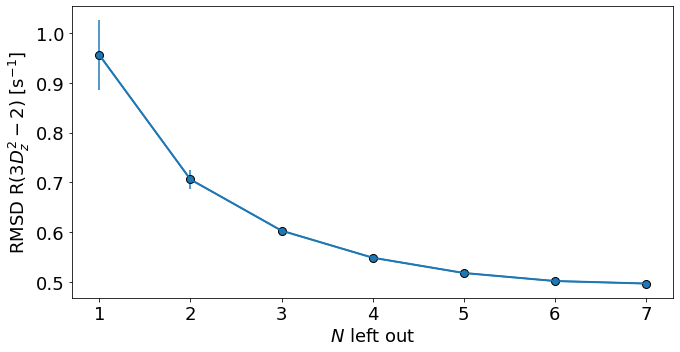

In [30]:
for r in range(3):
    rw.evaluate_sampling( 100, r, labels[r], outfig = f'leave_N_out_{r}' )